In [91]:
import importlib
import Policy 
import Environment
import Diadic

from tqdm.auto import tqdm

importlib.reload(Policy)
importlib.reload(Environment)
importlib.reload(Diadic)

import matplotlib.pyplot as plt
import numpy as np

In [92]:
class Simulator :
    def __init__(self, algo, env, T) -> None:
        self.algo = algo
        self.env = env
        self.T = T
    
    def run(self):
        
        for t in tqdm(range(self.T)) :
            x_t = self.algo.choose_action()
            y_t = self.env.get_reward(t, x_t)
            self.algo.update(x_t, y_t)
            self.update_regret(t, x_t)

    def update_regret(self, t, x_t):
        best_mean_value_t = 1 # assuming instances of this kind
        r_t = best_mean_value_t - self.env.get_reward(t, x_t)
        self.algo.regrets.append(r_t)
            

In [88]:
T = 20000
env = Environment.Environment(T, 3)

Entering Episode 1
Entering Block 3


/Users/nicolasnguyen/Documents/Projets/Non-Stationary Lipschitz Bandits/NS_Lipschitz_Bandits/Policy.py:258: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


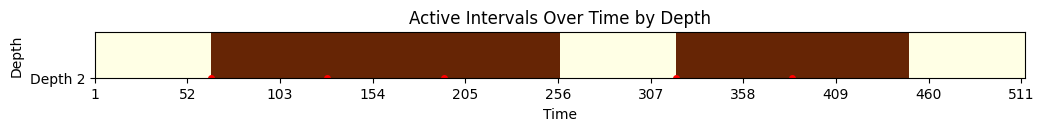

In [89]:
algo = Policy.MBDE(T)
algo.initialize_episode()
algo.initialize_block()
algo.tree.update_proba()
sim = Simulator(algo, env, T)


  1%|          | 501/100000 [00:01<07:34, 218.79it/s] 

Entering Block 4


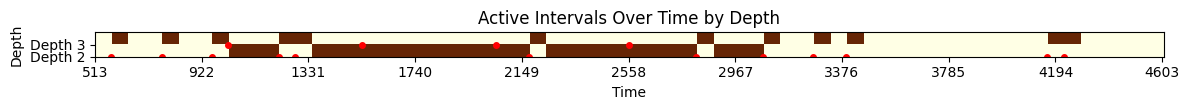

  1%|          | 711/100000 [00:01<02:55, 566.63it/s]

evicted with interval [516, 519]
Node (4, 1) evicted at t=519 (Replay(4))
evicted with interval [516, 519]
Node (4, 3) evicted at t=519 (Replay(4))
evicted with interval [516, 519]
Node (4, 4) evicted at t=519 (Replay(4))
evicted with interval [516, 519]
Node (4, 5) evicted at t=519 (Replay(4))
evicted with interval [516, 519]
Node (4, 6) evicted at t=519 (Replay(4))
evicted with interval [516, 519]
Node (4, 7) evicted at t=519 (Replay(4))
evicted with interval [516, 519]
Node (4, 8) evicted at t=519 (Replay(4))


  2%|▏         | 1829/100000 [00:49<2:11:00, 12.49it/s]

evicted with interval [1828, 1831]
Node (4, 1) evicted at t=1831 (Replay(3))
evicted with interval [1828, 1831]
Node (4, 2) evicted at t=1831 (Replay(3))
evicted with interval [1828, 1831]
Node (4, 3) evicted at t=1831 (Replay(3))
evicted with interval [1828, 1831]
Node (4, 4) evicted at t=1831 (Replay(3))
evicted with interval [1828, 1831]
Node (4, 5) evicted at t=1831 (Replay(3))
evicted with interval [1828, 1831]
Node (4, 6) evicted at t=1831 (Replay(3))
evicted with interval [1828, 1831]
Node (4, 8) evicted at t=1831 (Replay(3))
SHIFT DETECTED : 1832
Entering Episode 2
Entering Block 3


/Users/nicolasnguyen/Documents/Projets/Non-Stationary Lipschitz Bandits/NS_Lipschitz_Bandits/Policy.py:258: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


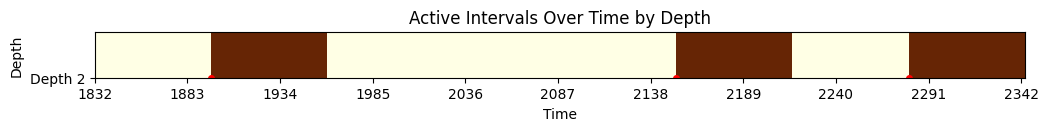

  2%|▏         | 2332/100000 [00:50<08:35, 189.56it/s] 

Entering Block 4


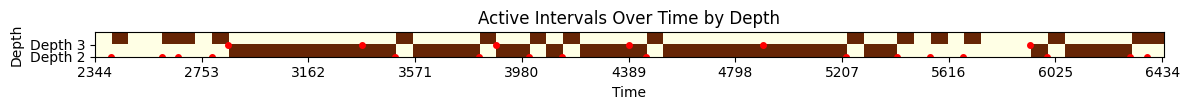

  3%|▎         | 2762/100000 [00:55<09:38, 168.03it/s]

evicted with interval [2708, 2711]
Node (4, 2) evicted at t=2711 (Replay(3))
evicted with interval [2708, 2711]
Node (4, 3) evicted at t=2711 (Replay(3))
evicted with interval [2708, 2711]
Node (4, 4) evicted at t=2711 (Replay(3))
evicted with interval [2708, 2711]
Node (4, 5) evicted at t=2711 (Replay(3))
evicted with interval [2708, 2711]
Node (4, 6) evicted at t=2711 (Replay(3))
evicted with interval [2708, 2711]
Node (4, 7) evicted at t=2711 (Replay(3))
evicted with interval [2708, 2711]
Node (4, 8) evicted at t=2711 (Replay(3))


  4%|▎         | 3730/100000 [01:25<36:33, 43.88it/s]  


KeyboardInterrupt: 

In [90]:
sim.run()

In [81]:
BinningUCB = Policy.BinningUCB(T)
sim = Simulator(BinningUCB, env, T)

K optimal =  20


In [82]:
sim.run()

100%|██████████| 100000/100000 [00:00<00:00, 148040.28it/s]


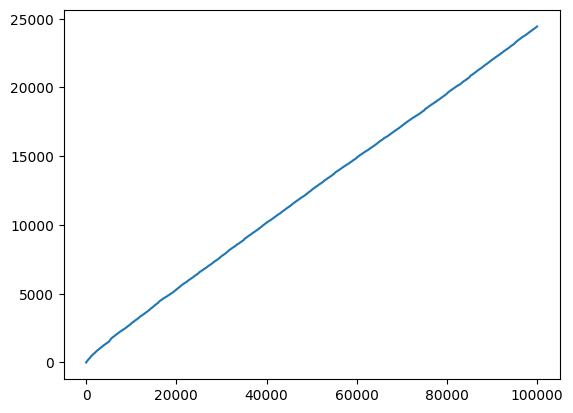

In [83]:
plt.plot(np.cumsum(sim.algo.regrets))
#plt.plot(np.cumsum([1 for _ in range(T)]))
#plt.plot([30*np.sqrt(x) for x in range(T)])

In [14]:
sim.algo.tree.active_depths

{5: [(5,14)]}

In [15]:
sim.algo.B_MASTER

[(5,14)]

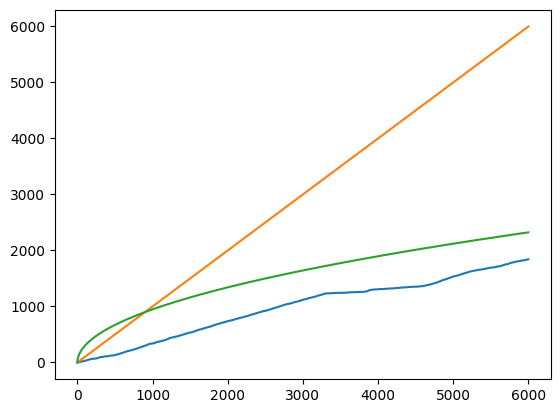

In [16]:
plt.plot(np.cumsum(sim.algo.regrets))
plt.plot(np.cumsum([1 for _ in range(T)]))
plt.plot([30*np.sqrt(x) for x in range(T)])

In [75]:
importlib.reload(Environment)
Env_test = Environment.Environment(10000, 3)

In [76]:
x_list = list(np.linspace(0, 1, 1000))
y_list_1 = [Env_test.mean_reward(200, x) for x in x_list]
y_list_2 = [Env_test.mean_reward(300, x) for x in x_list]
y_list_3 = [Env_test.mean_reward(1000, x) for x in x_list]
y_list_4 = [Env_test.mean_reward(2000, x) for x in x_list]
y_list_5 = [Env_test.mean_reward(3000, x) for x in x_list]
y_list_6 = [Env_test.mean_reward(5000, x) for x in x_list]
y_list_7 = [Env_test.mean_reward(6000, x) for x in x_list]
y_list_8 = [Env_test.mean_reward(7000, x) for x in x_list]
y_list_9 = [Env_test.mean_reward(8000, x) for x in x_list]
y_list_10 = [Env_test.mean_reward(9000, x) for x in x_list]

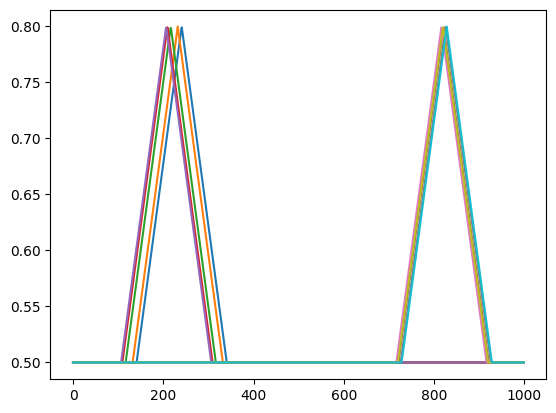

In [77]:
plt.plot(y_list_1)
plt.plot(y_list_2)
plt.plot(y_list_3)
plt.plot(y_list_4)
plt.plot(y_list_5)
plt.plot(y_list_6)
plt.plot(y_list_7)
plt.plot(y_list_8)
plt.plot(y_list_9)
plt.plot(y_list_10)